<a href="https://colab.research.google.com/github/pkpotter03/mainflow-data-analytics-python/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [7]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


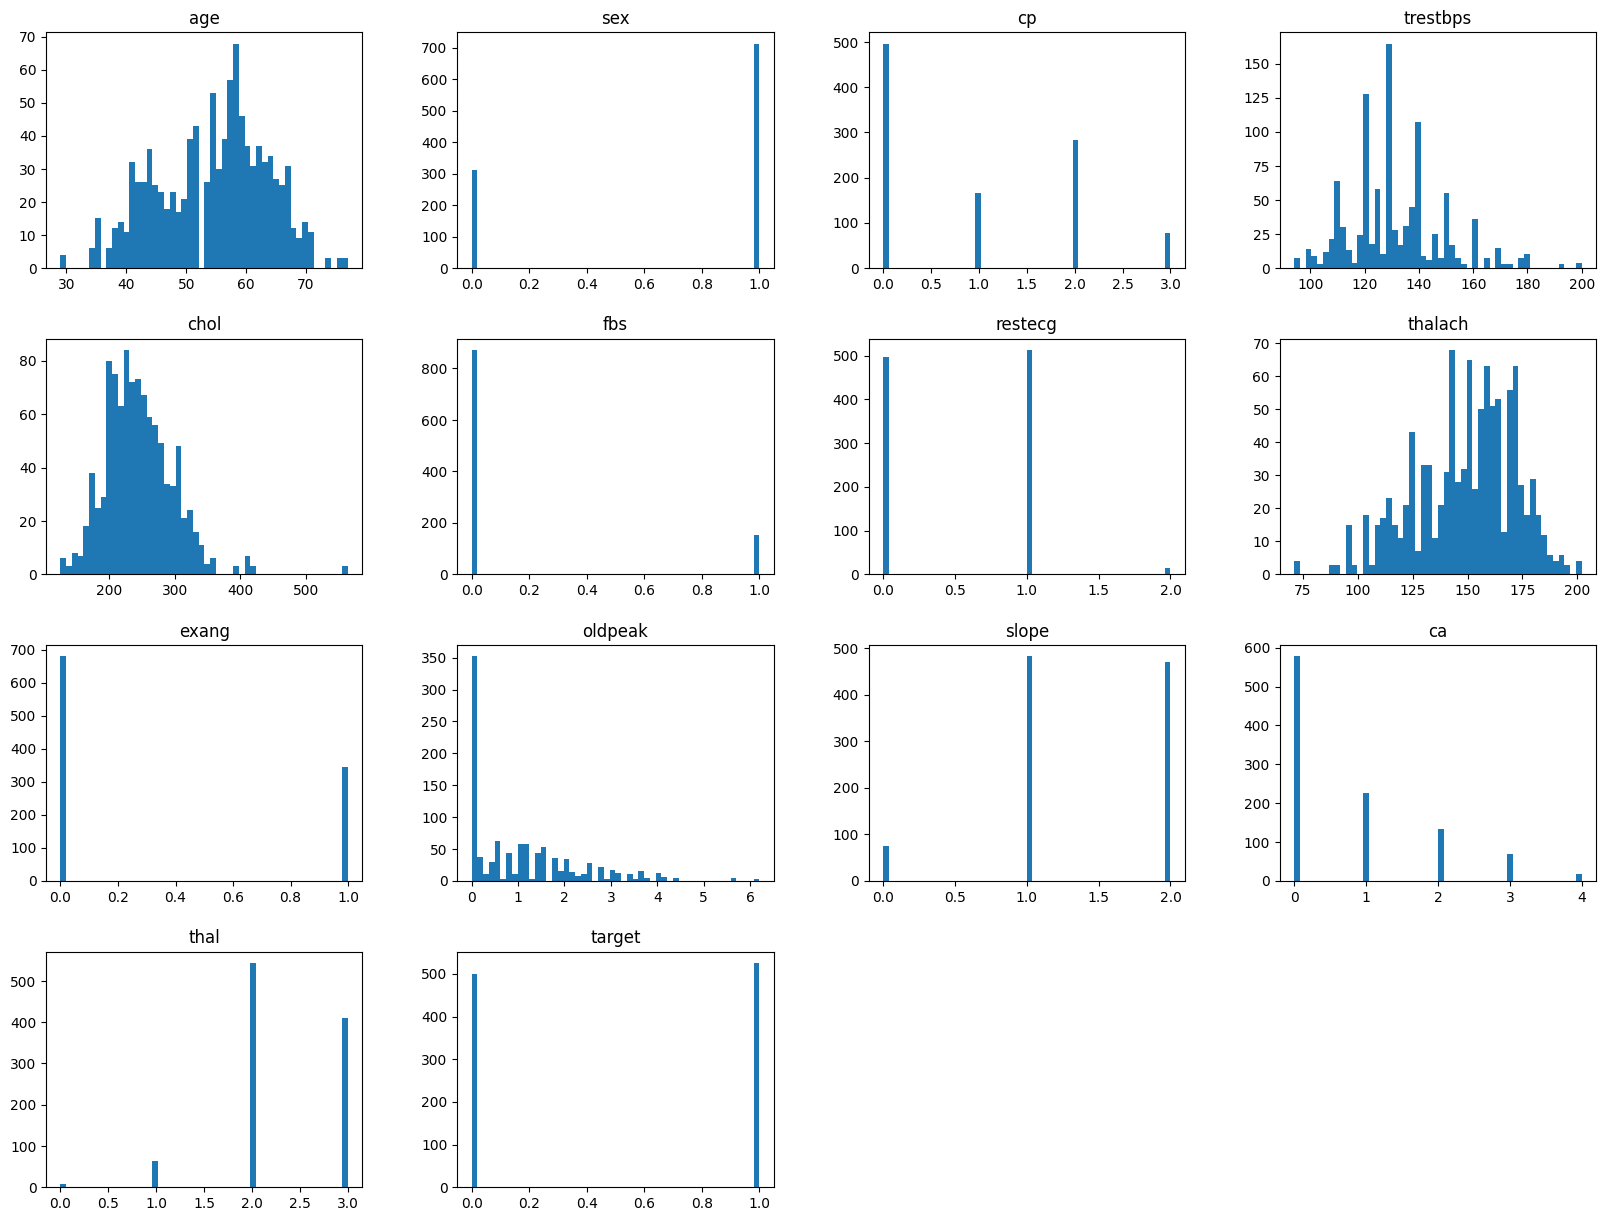

In [9]:
df.hist(bins=50, grid=False, figsize=(20,15));

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
# Q1. How many people have heart disease and how many don't?
df.target.value_counts()

,count
target,
1,526
0,499


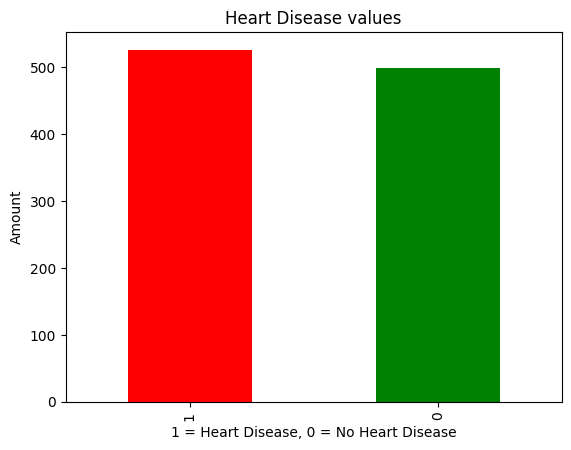

In [21]:
df.target.value_counts().plot(kind='bar', color=['red', 'green'], title='Heart Disease values', xlabel= '1 = Heart Disease, 0 = No Heart Disease', ylabel='Amount');

In [45]:
# Q2. People of which sex have the most heart disease?
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,86,226
1,413,300


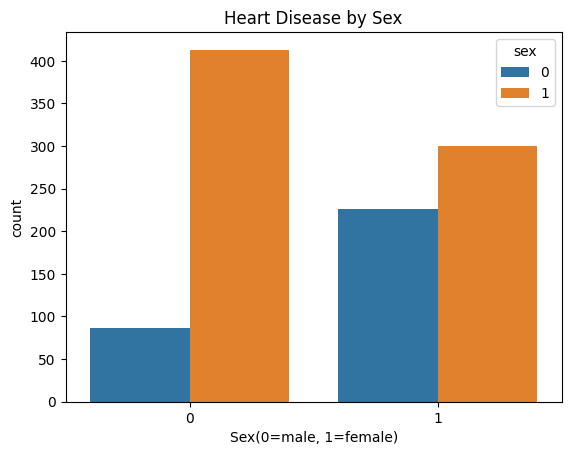

In [52]:
sns.countplot(x='target', data=df, hue='sex')
plt.title('Heart Disease by Sex')
plt.xlabel('Sex(0=male, 1=female)');

In [59]:
# Q3. People of which sex have which type of chest pain most?
pd.crosstab(df['sex'], df['cp'])

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


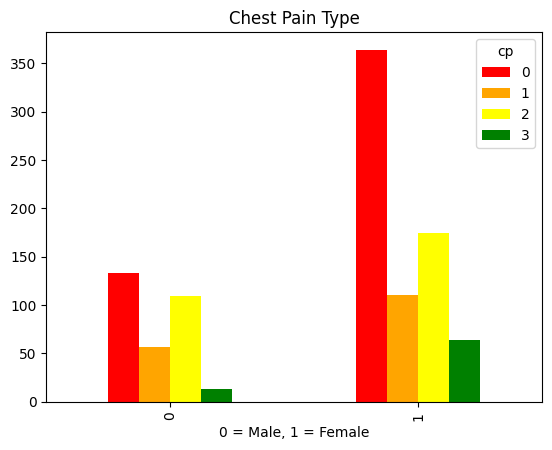

In [60]:
pd.crosstab(df['sex'], df['cp']).plot(kind='bar',color=['red', 'orange', 'yellow', 'green'] , title='Chest Pain Type', xlabel='0 = Male, 1 = Female');

In [61]:
# Q4. People with which chest pain are most prone to have heart disease?
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


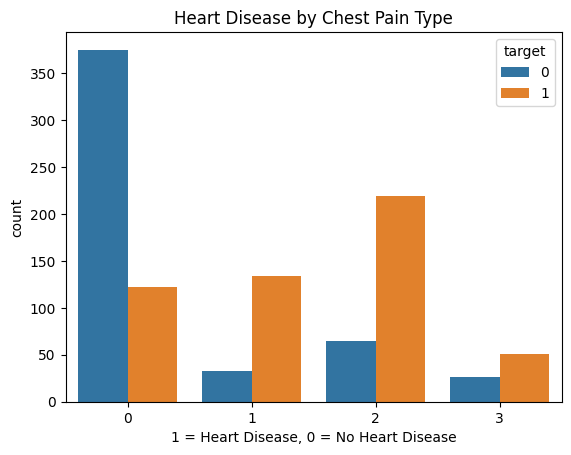

In [63]:
sns.countplot(x='cp', data=df, hue='target')
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('1 = Heart Disease, 0 = No Heart Disease');

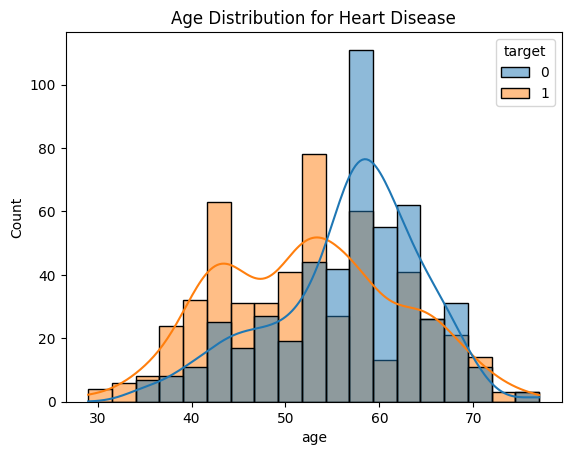

In [66]:
# Q5. What is the age distribution of people with and without heart disease?
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.title('Age Distribution for Heart Disease');

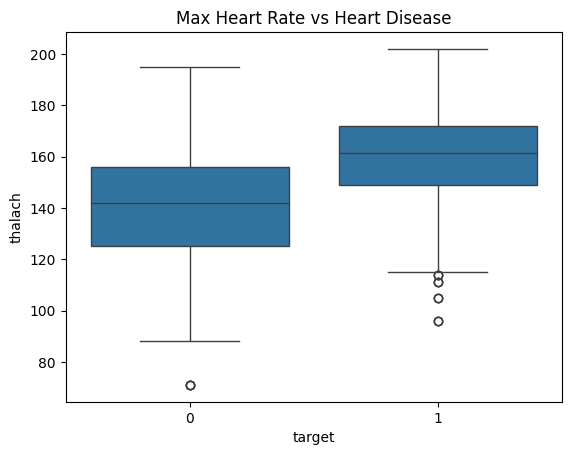

In [68]:
# Q6. What is the relationship between maximum heart rate (thalach) and heart disease?
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Max Heart Rate vs Heart Disease');

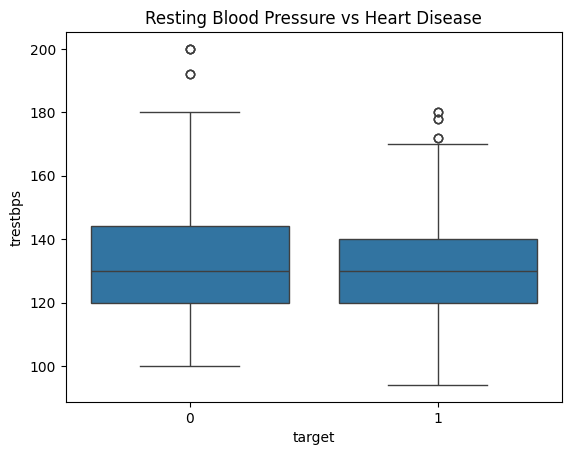

In [70]:
# Q7. How does resting blood pressure (trestbps) correlate with heart disease?
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure vs Heart Disease');